<a href="https://colab.research.google.com/github/AryanG0604/FraudClaimDetection/blob/main/Fraud_Claim_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from xgboost import XGBClassifier


In [ ]:
! pip install pandas pandas-profiling
! pip install xgboost scikit-learn


In [ ]:
df = pd.read_csv('fraud_oracle.csv')
df.head(10)

Month  WeekOfMonth  DayOfWeek    Make AccidentArea DayOfWeekClaimed  \
0   Dec            5  Wednesday   Honda        Urban          Tuesday   
1   Jan            3  Wednesday   Honda        Urban           Monday   
2   Oct            5     Friday   Honda        Urban         Thursday   
3   Jun            2   Saturday  Toyota        Rural           Friday   
4   Jan            5     Monday   Honda        Urban          Tuesday   
5   Oct            4     Friday   Honda        Urban        Wednesday   
6   Feb            1   Saturday   Honda        Urban           Monday   
7   Nov            1     Friday   Honda        Urban          Tuesday   
8   Dec            4   Saturday   Honda        Urban        Wednesday   
9   Apr            3    Tuesday    Ford        Urban        Wednesday   

  MonthClaimed  WeekOfMonthClaimed     Sex MaritalStatus  ...  AgeOfVehicle  \
0          Jan                   1  Female        Single  ...       3 years   
1          Jan                   4    Male        Single  ...       6 years   
2          Nov                   2    Male       Married  ...       7 years   
3          Jul                   1    Male       Married  ...   more than 7   
4          Feb                   2  Female        Single  ...       5 years   
5          Nov                   1    Male        Single  ...       5 years   
6          Feb                   3    Male       Married  ...       7 years   
7          Mar                   4    Male        Single  ...           new   
8          Dec                   5    Male        Single  ...       6 years   
9          Apr                   3    Male       Married  ...   more than 7   

  AgeOfPolicyHolder PoliceReportFiled WitnessPresent AgentType  \
0          26 to 30                No             No  External   
1          31 to 35               Yes             No  External   
2          41 to 50                No             No  External   
3          51 to 65               Yes             No  External   
4          31 to 35                No             No  External   
5          21 to 25                No             No  External   
6          36 to 40                No             No  External   
7          16 to 17                No             No  External   
8          31 to 35                No            Yes  External   
9          36 to 40                No             No  External   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                 none               1 year        3 to 4  1994   Liability  
1                 none            no change     1 vehicle  1994   Collision  
2                 none            no change     1 vehicle  1994   Collision  
3          more than 5            no change     1 vehicle  1994   Liability  
4                 none            no change     1 vehicle  1994   Collision  
5               3 to 5            no change     1 vehicle  1994   Collision  
6               1 to 2            no change     1 vehicle  1994   Collision  
7                 none            no change     1 vehicle  1994   Collision  
8               3 to 5            no change     1 vehicle  1994   Collision  
9               3 to 5            no change     1 vehicle  1994  All Perils  

[10 rows x 33 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
df.describe()

WeekOfMonth  WeekOfMonthClaimed           Age  FraudFound_P  \
count  15420.000000        15420.000000  15420.000000  15420.000000   
mean       2.788586            2.693969     39.855707      0.059857   
std        1.287585            1.259115     13.492377      0.237230   
min        1.000000            1.000000      0.000000      0.000000   
25%        2.000000            2.000000     31.000000      0.000000   
50%        3.000000            3.000000     38.000000      0.000000   
75%        4.000000            4.000000     48.000000      0.000000   
max        5.000000            5.000000     80.000000      1.000000   

       PolicyNumber     RepNumber    Deductible  DriverRating          Year  
count  15420.000000  15420.000000  15420.000000  15420.000000  15420.000000  
mean    7710.500000      8.483268    407.704280      2.487808   1994.866472  
std     4451.514911      4.599948     43.950998      1.119453      0.803313  
min        1.000000      1.000000    300.000000      1.000000   1994.000000  
25%     3855.750000      5.000000    400.000000      1.000000   1994.000000  
50%     7710.500000      8.000000    400.000000      2.000000   1995.000000  
75%    11565.250000     12.000000    400.000000      3.000000   1996.000000  
max    15420.000000     16.000000    700.000000      4.000000   1996.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [ ]:
df.describe(include='object')

Month DayOfWeek     Make AccidentArea DayOfWeekClaimed MonthClaimed  \
count   15420     15420    15420        15420            15420        15420   
unique     12         7       19            2                8           13   
top       Jan    Monday  Pontiac        Urban           Monday          Jan   
freq     1411      2616     3837        13822             3757         1446   

          Sex MaritalStatus          Fault         PolicyType  ...  \
count   15420         15420          15420              15420  ...   
unique      2             4              2                  9  ...   
top      Male       Married  Policy Holder  Sedan - Collision  ...   
freq    13000         10625          11230               5584  ...   

       PastNumberOfClaims AgeOfVehicle AgeOfPolicyHolder PoliceReportFiled  \
count               15420        15420             15420             15420   
unique                  4            8                 9                 2   
top                2 to 4      7 years          31 to 35                No   
freq                 5485         5807              5593             14992   

       WitnessPresent AgentType NumberOfSuppliments AddressChange_Claim  \
count           15420     15420               15420               15420   
unique              2         2                   4                   5   
top                No  External                none           no change   
freq            15333     15179                7047               14324   

       NumberOfCars BasePolicy  
count         15420      15420  
unique            5          3  
top       1 vehicle  Collision  
freq          14316       5962  

[4 rows x 24 columns]

In [ ]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [ ]:
print(df['Fault'].unique())
print(df['PolicyType'].unique())
print(df['FraudFound_P'].unique())
print(df['BasePolicy'].unique())

['Policy Holder' 'Third Party']
['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']
[0 1]
['Liability' 'Collision' 'All Perils']


In [ ]:
df.isnull().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
FraudFound_P            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days_Policy_Accident    0
Days_Policy_Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange_Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
dtype: int64

In [ ]:
isNull = df.isnull().sum().to_frame(name='isNull').T
isNa = df.isna().sum().to_frame(name='isNa').T
Unique = df.nunique().to_frame(name='Unique').T
summary = pd.concat([Unique, isNa, isNull])
summary

Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
Unique     12            5          7    19             2                 8   
isNa        0            0          0     0             0                 0   
isNull      0            0          0     0             0                 0   

        MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  \
Unique            13                   5    2              4  ...   
isNa               0                   0    0              0  ...   
isNull             0                   0    0              0  ...   

        AgeOfVehicle  AgeOfPolicyHolder  PoliceReportFiled  WitnessPresent  \
Unique             8                  9                  2               2   
isNa               0                  0                  0               0   
isNull             0                  0                  0               0   

        AgentType  NumberOfSuppliments  AddressChange_Claim  NumberOfCars  \
Unique          2                    4                    5             5   
isNa            0                    0                    0             0   
isNull          0                    0                    0             0   

        Year  BasePolicy  
Unique     3           3  
isNa       0           0  
isNull     0           0  

[3 rows x 33 columns]

In [ ]:
df.duplicated().sum()


0

In [ ]:
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

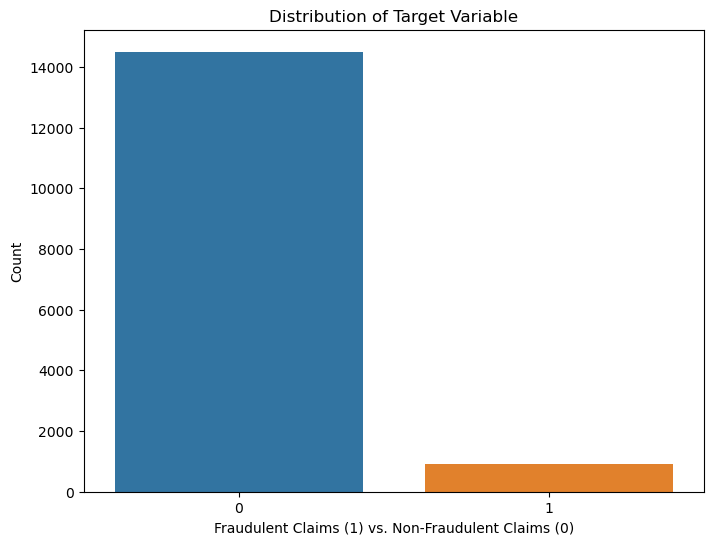

In [ ]:
# Target Variable Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='FraudFound_P', data=df)
plt.xlabel('Fraudulent Claims (1) vs. Non-Fraudulent Claims (0)')
plt.ylabel('Count')
plt.title('Distribution of Target Variable')
plt.show()

## Clearly the distribution is totally imbalanced

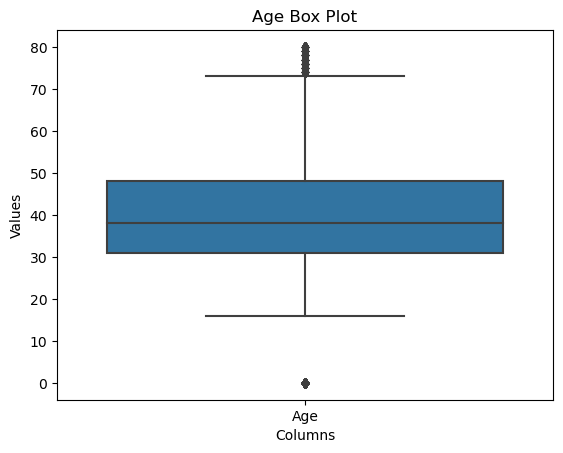

In [ ]:
# plot the graph
columns_to_plot = ['Age']
sns.boxplot(data=df[columns_to_plot])

# Add title and labels
plt.title('Age Box Plot')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

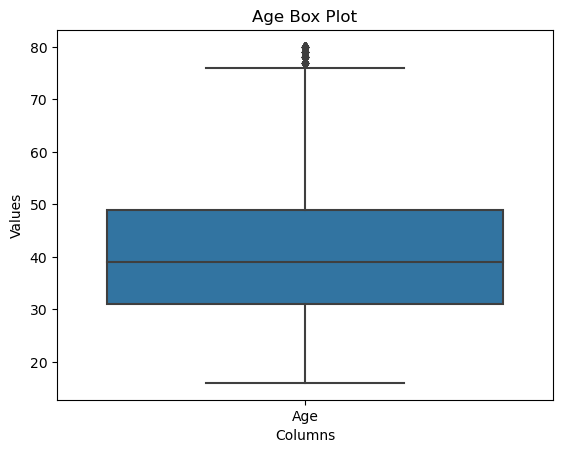

In [ ]:
# Age=0 is clearly an outlier and even practically impossible
df = df[df['Age'] != 0]

# Replotting the graph
columns_to_plot = ['Age']
sns.boxplot(data=df[columns_to_plot])

# Add title and labels
plt.title('Age Box Plot')
plt.xlabel('Columns')
plt.ylabel('Values')

# Show the plot
plt.show()

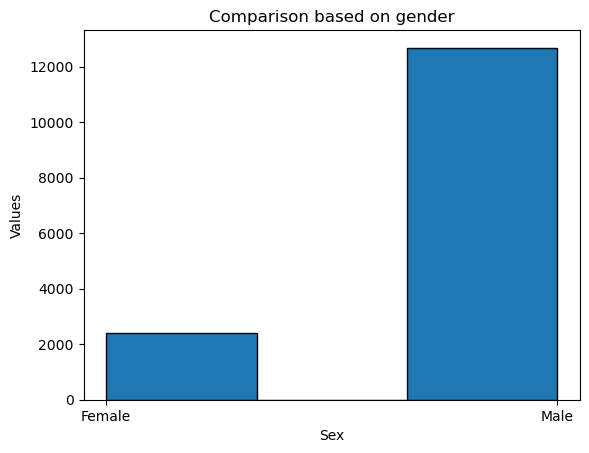

In [ ]:

# Create a bar graph
plt.hist(df['Sex'], bins=3, edgecolor='black')

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Values')
plt.title('Comparison based on gender')

# Show the graph
plt.show()

## This shows males were more prone to accident

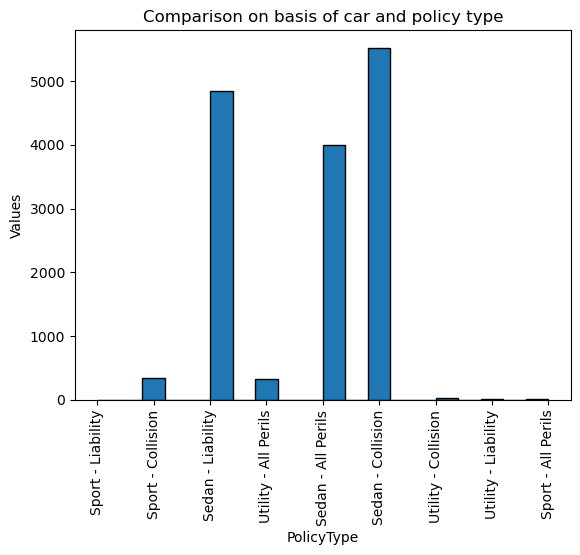

In [ ]:
# Create a bar graph
plt.hist(df['PolicyType'], bins=20, edgecolor='black')

# Add labels and title
plt.xlabel('PolicyType')
plt.ylabel('Values')
plt.title('Comparison on basis of car and policy type')

plt.xticks(rotation=90)

# Show the graph
plt.show()

## This clearly states that sedans were the major car group for the insurance claim

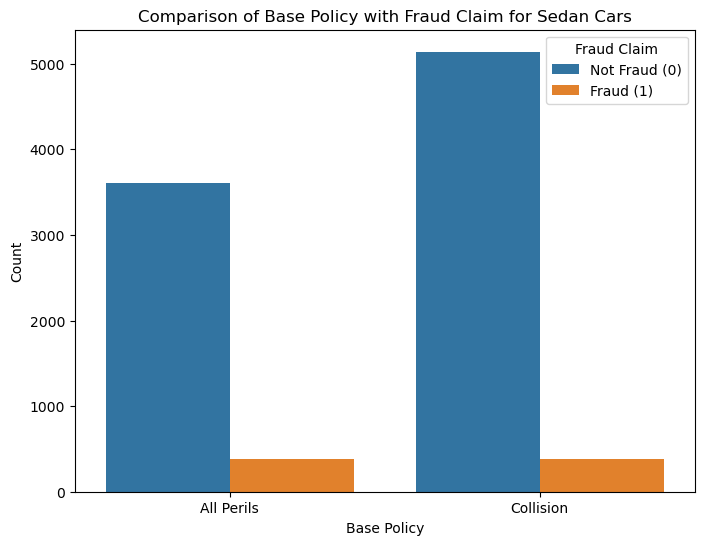

In [ ]:
## Here is the comparison of only sedan cars wrt to base policy
## Here we also found out that there are no 'liable' base policy present

sedan_df = df[df['VehicleCategory'] == 'Sedan']

plt.figure(figsize=(8, 6))
sns.countplot(data=sedan_df, x='BasePolicy', hue='FraudFound_P')
plt.title('Comparison of Base Policy with Fraud Claim for Sedan Cars')
plt.xlabel('Base Policy')
plt.ylabel('Count')
plt.legend(title='Fraud Claim', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()

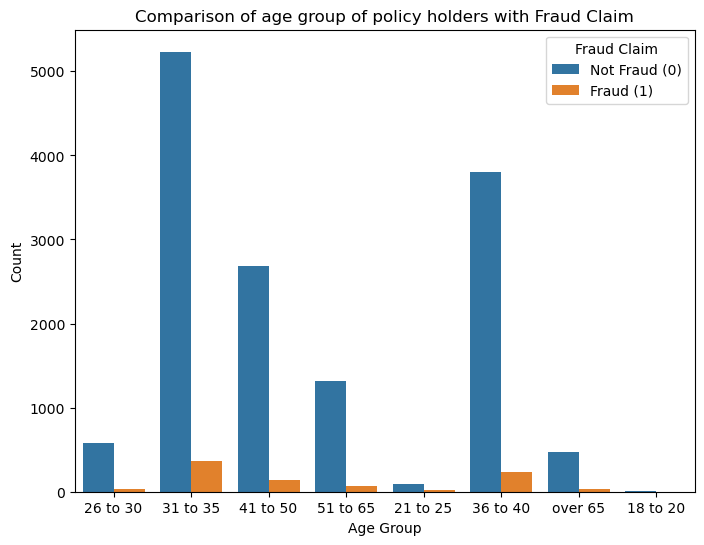

In [ ]:
## Dataset taken is whole df

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='AgeOfPolicyHolder', hue='FraudFound_P')
plt.title('Comparison of age group of policy holders with Fraud Claim')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Fraud Claim', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()

## We can observe that the Age group '31-40' applied for majority of claims and proportion of fraud claims is also same

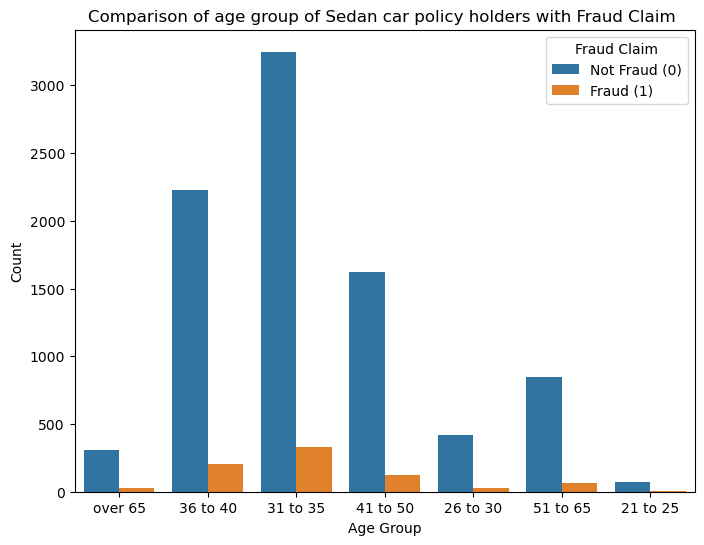

In [ ]:
## Dataset taken is sedan_df

plt.figure(figsize=(8, 6))
sns.countplot(data=sedan_df, x='AgeOfPolicyHolder', hue='FraudFound_P')
plt.title('Comparison of age group of Sedan car policy holders with Fraud Claim ')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Fraud Claim', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()

## Same relations can be seen for the Sedan car holders
## So till now we can say that most insurance claims and most fraud insurance claims are done by the Sedan car holders of age group '31-35' and '36-40'

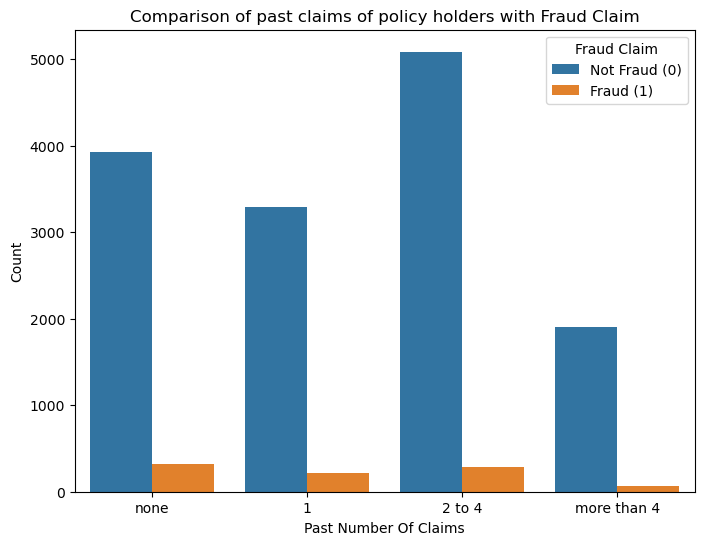

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PastNumberOfClaims', hue='FraudFound_P')
plt.title('Comparison of past claims of policy holders with Fraud Claim')
plt.xlabel('Past Number Of Claims')
plt.ylabel('Count')
plt.legend(title='Fraud Claim', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()

## This shows that many fraudsters showed that they have done previously zero claims but its pretty much uncertain

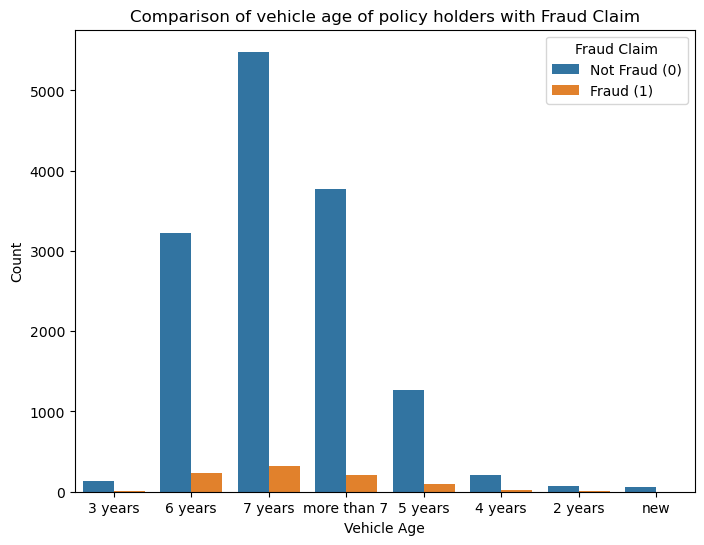

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='AgeOfVehicle', hue='FraudFound_P')
plt.title('Comparison of vehicle age of policy holders with Fraud Claim')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.legend(title='Fraud Claim', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()

## This clearly shows that most claims and fraud claims were for old cars

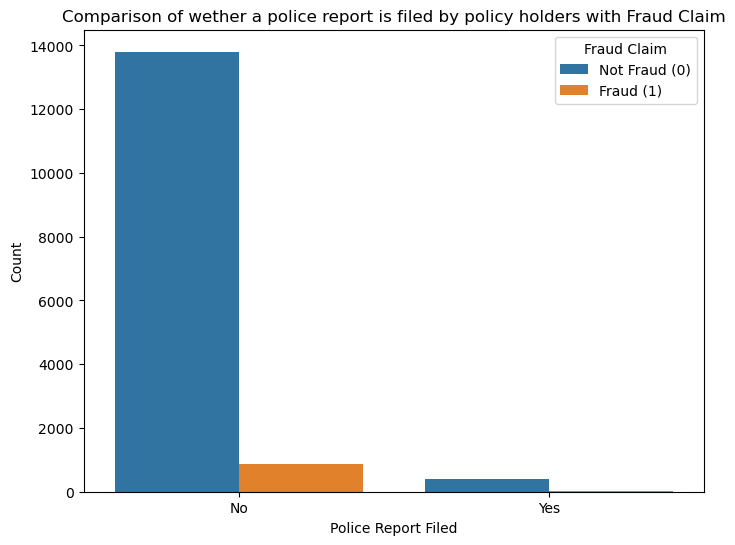

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='PoliceReportFiled', hue='FraudFound_P')
plt.title('Comparison of wether a police report is filed by policy holders with Fraud Claim')
plt.xlabel('Police Report Filed')
plt.ylabel('Count')
plt.legend(title='Fraud Claim', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()

## This shows that generally people don't file police reports for accidents and fraudsters don't file police report too, which matches with real life situations

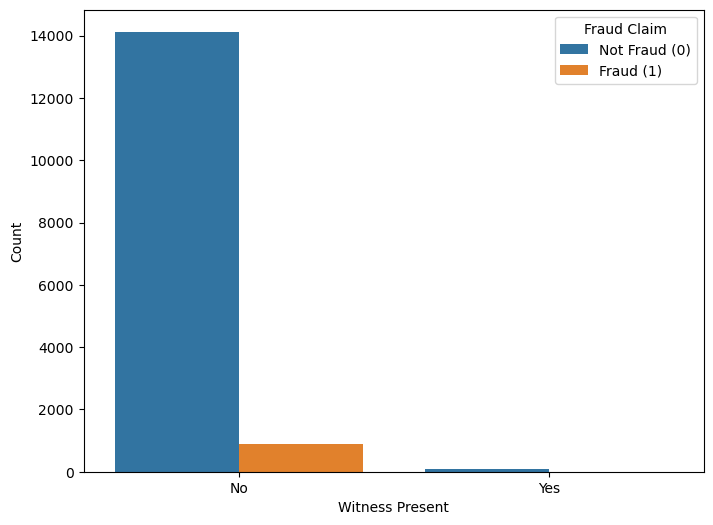

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='WitnessPresent', hue='FraudFound_P')
plt.xlabel('Witness Present')
plt.ylabel('Count')
plt.legend(title='Fraud Claim', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.show()

## This shows that witness generally didn't show up for accident claims, similarly happens in case of fraud claims

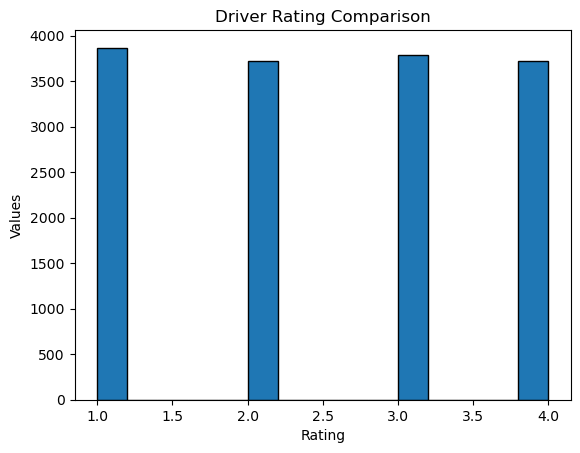

In [ ]:
plt.hist(df['DriverRating'], bins=15, edgecolor='black')

plt.xlabel('Rating')
plt.ylabel('Values')
plt.title('Driver Rating Comparison')

plt.show()

# Clearly shows that driver rating has no effect on accidents and there claims

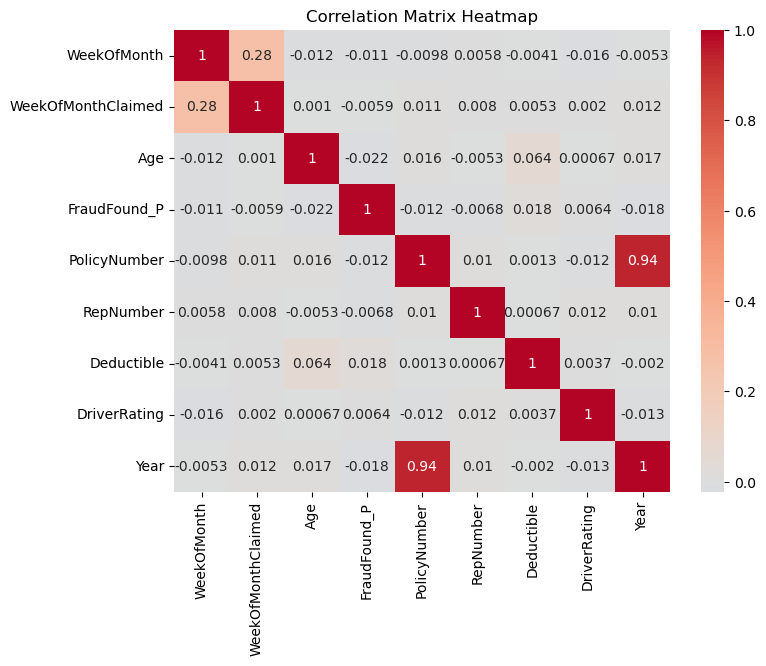

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
print(df['PolicyType'].unique())
print('\n')
print(df['BasePolicy'].unique())
print('\n')
print(df['VehicleCategory'].unique())

['Sport - Liability' 'Sport - Collision' 'Sedan - Liability'
 'Utility - All Perils' 'Sedan - All Perils' 'Sedan - Collision'
 'Utility - Collision' 'Utility - Liability' 'Sport - All Perils']


['Liability' 'Collision' 'All Perils']


['Sport' 'Utility' 'Sedan']


In [ ]:
""""
As seen above the latter two combine two form the first so we can remove some and we'll
have no distinctive effect in our dataset but as we'll have to label encode the 'object' columns so we can drop the
'PolicyType' column so that we'll be able to distinctively label encode the rest of the two.
"""

'"\nAs seen above the latter two combine two form the first so we can remove some and we\'ll \nhave no distinctive effect in our dataset but as we\'ll have to label encode the \'object\' columns so we can drop the \n\'PolicyType\' column so that we\'ll be able to distinctively label encode the rest of the two.\n'

In [ ]:
# ## Performing feature engineering


# age_bins = [0, 25, 45, 100]
# age_labels = ['Young', 'Middle-aged', 'Senior']
# df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)


In [ ]:
categorical_features=[]
for i in df.columns:
    if df[i].dtype=='object':
        categorical_features.append(i)

label_encoder = LabelEncoder()
for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

df.head()

C:\Users\owner\AppData\Local\Temp\ipykernel_1700\2075251800.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = label_encoder.fit_transform(df[feature])


Month  WeekOfMonth  DayOfWeek  Make  AccidentArea  DayOfWeekClaimed  \
0      2            5          6     6             1                 5   
1      4            3          6     6             1                 1   
2     10            5          0     6             1                 4   
3      6            2          2    17             0                 0   
4      4            5          1     6             1                 5   

   MonthClaimed  WeekOfMonthClaimed  Sex  MaritalStatus  ...  AgeOfVehicle  \
0             4                   1    0              2  ...             1   
1             4                   4    1              2  ...             4   
2             9                   2    1              1  ...             5   
3             5                   1    1              1  ...             6   
4             3                   2    0              2  ...             3   

   AgeOfPolicyHolder  PoliceReportFiled  WitnessPresent  AgentType  \
0                  2                  0               0          0   
1                  3                  1               0          0   
2                  5                  0               0          0   
3                  6                  1               0          0   
4                  3                  0               0          0   

   NumberOfSuppliments  AddressChange_Claim  NumberOfCars  Year  BasePolicy  
0                    3                    0             2  1994           2  
1                    3                    3             0  1994           1  
2                    3                    3             0  1994           1  
3                    2                    3             0  1994           2  
4                    3                    3             0  1994           1  

[5 rows x 33 columns]

In [ ]:
# Split the dataset into training and testing sets
X = df.drop(['FraudFound_P', 'PolicyNumber', 'RepNumber','PolicyType','WeekOfMonth','WeekOfMonthClaimed','Age','Days_Policy_Accident','Days_Policy_Claim'], axis=1)
# Exclude ID-related columns, and the irrelevant columns
y = df['FraudFound_P']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
def apply_models(X_train, X_test, y_train, y_test):
    """
    Applying multiple machine learning models and evaluating their performance.

    Parameters:
        X_train (numpy.ndarray): Training features.
        X_test (numpy.ndarray): Testing features.
        y_train (numpy.ndarray): Training labels.
        y_test (numpy.ndarray): Testing labels.

    Returns:
        dict: A dictionary containing the evaluation metrics for each model.
    """
    models = {
        'Logistic Regression': LogisticRegression(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42,class_weight='balanced'),
        'Support Vector Machine': SVC(random_state=42, probability=True),
        'XGBoost': XGBClassifier(learning_rate = 0.01, max_depth = 7, n_estimators = 100, scale_pos_weight=2),
        'AdaBoost': AdaBoostClassifier(random_state=42),
    }

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    results = {}

    for model_name, model in models.items():

#         if model_name == 'XGBoost':
#             # Hyperparameter tuning for XGBoost using GridSearchCV
#             param_grid = {
#                 'scale_pos_weight': [1, 2, 5],  # Try different values for class weight balancing
#                 'learning_rate': [0.01, 0.1, 0.3],
#                 'max_depth': [3, 5, 7],
#                 'n_estimators': [100, 200, 300]
#             }
#             grid_search = GridSearchCV(model, param_grid, cv=3, scoring='f1_weighted')
#             grid_search.fit(X_train_scaled, y_train)
#             model = grid_search.best_estimator_
#             print(f"Best hyperparameters for XGBoost: {grid_search.best_params_}")


        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred,average='weighted')
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        cm = confusion_matrix(y_test, y_pred)

        results[model_name] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'ROC AUC Score': roc_auc,
            'Confusion Matrix': cm
        }

    return results

In [ ]:
# Apply models and get the evaluation metrics
model_results = apply_models(X_train, X_test, y_train, y_test)

# Print the evaluation metrics for each model
for model_name, metrics in model_results.items():
    print(f"Model: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("-" * 30)


C:\Users\owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Logistic Regression
Accuracy: 0.9410596026490067
Precision: 0.0
Recall: 0.0
F1 Score: 0.912484268416403
ROC AUC Score: 0.7989002135789095
Confusion Matrix: [[4263    0]
 [ 267    0]]
------------------------------
Model: Random Forest
Accuracy: 0.9415011037527594
Precision: 0.75
Recall: 0.011235955056179775
F1 Score: 0.9139903616821945
ROC AUC Score: 0.8067036190687045
Confusion Matrix: [[4262    1]
 [ 264    3]]
------------------------------
Model: Support Vector Machine
Accuracy: 0.9417218543046357
Precision: 1.0
Recall: 0.011235955056179775
F1 Score: 0.9141054831021606
ROC AUC Score: 0.7160182425029936
Confusion Matrix: [[4263    0]
 [ 264    3]]
------------------------------
Model: XGBoost
Accuracy: 0.941280353200883
Precision: 0.52
Recall: 0.04868913857677903
F1 Score: 0.9177582386628886
ROC AUC Score: 0.8301599601483367
Confusion Matrix: [[4251   12]
 [ 254   13]]
------------------------------
Model: AdaBoost
Accuracy: 0.9364238410596026
Precision: 0.18181818181818182
R